<h1>Clustering evaluation tool</h1>

<h6>
<u>File</u>: clustering_eval.ipynb <br>
<br>
<u>Author</u>: Ewerton Belchior <br>
<br>
<u>Goal</u>: an internal notebook to be run by main_cluster_eval.ipynb. It is automatically run. <br>
<br>

### Helper function

In [ ]:
# skip notebook if missing truth files
SKIP_NOTEBOOK = False

# helper function to skip notebook execution
def skip_if_needed():
    if globals().get("SKIP_NOTEBOOK", False):
        return True
    return False

In [43]:
# read input and create arrays
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pathlib import Path
import sys
import os

# set DIR
WORKDIR=Path("/exp/sbnd/app/users/ebatista/wirecell-clustering/work")
OUTDIR=Path("/exp/sbnd/data/users/ebatista/wirecell-clustering/out")

if PROCESS == "nu_spill":
  OUTDIR = OUTDIR / SBNDCODE_VERSION / PROCESS    
elif PROCESS == "cosmics":
  #OUTDIR=OUTDIR/"bnb_nu_cosmic"
  #OUTDIR=OUTDIR/"bnb_nu_cosmic_additional"
  OUTDIR = OUTDIR / SBNDCODE_VERSION / "bnb_nu_cosmic_additional"
else:
  print("\n Incorrect PROCESS.\n\n")

def read_true_coordinates(files):
    """Reads coordinates from text files and returns numpy arrays."""
    _x = np.loadtxt(files[0])
    _y = np.loadtxt(files[1])
    _z = np.loadtxt(files[2])
    _id = np.loadtxt(files[3])
    _q = np.loadtxt(files[4])
    _e = np.loadtxt(files[5])
    return _x, _y, _z, _id, _q, _e

def read_pred_coordinates(files):
    """Reads coordinates from text files and returns numpy arrays."""
    _x = np.loadtxt(files[0])
    _y = np.loadtxt(files[1])
    _z = np.loadtxt(files[2])
    _id = np.loadtxt(files[3])
    _q = np.loadtxt(files[4])
    return _x, _y, _z, _id, _q 

NEWOUTDIR=OUTDIR/"xyz-coordinates"    
fx_true_apa0 = NEWOUTDIR / str(evt) / "x_truth_apa0.txt"
fy_true_apa0 = NEWOUTDIR / str(evt) / "y_truth_apa0.txt"
fz_true_apa0 = NEWOUTDIR / str(evt) / "z_truth_apa0.txt"
fq_true_apa0 = NEWOUTDIR / str(evt) / "q_truth_apa0.txt"
fid_true_apa0 = NEWOUTDIR / str(evt) / "id_truth_apa0.txt"
fe_true_apa0 = NEWOUTDIR / str(evt) / "e_truth_apa0.txt"

fx_true_apa1 = NEWOUTDIR / str(evt) / "x_truth_apa1.txt"
fy_true_apa1 = NEWOUTDIR / str(evt) / "y_truth_apa1.txt"
fz_true_apa1 = NEWOUTDIR / str(evt) / "z_truth_apa1.txt"
fq_true_apa1 = NEWOUTDIR / str(evt) / "q_truth_apa1.txt"
fid_true_apa1 = NEWOUTDIR / str(evt) / "id_truth_apa1.txt"
fe_true_apa1 = NEWOUTDIR / str(evt) / "e_truth_apa1.txt"

fx_pred_apa0 = NEWOUTDIR / str(evt) / "x_clustering_apa0.txt"
fy_pred_apa0 = NEWOUTDIR / str(evt) / "y_clustering_apa0.txt"
fz_pred_apa0 = NEWOUTDIR / str(evt) / "z_clustering_apa0.txt"
fq_pred_apa0 = NEWOUTDIR / str(evt) / "q_clustering_apa0.txt"
fid_pred_apa0 = NEWOUTDIR / str(evt) / "id_clustering_apa0.txt"

fx_pred_apa1 = NEWOUTDIR / str(evt) / "x_clustering_apa1.txt"
fy_pred_apa1 = NEWOUTDIR / str(evt) / "y_clustering_apa1.txt"
fz_pred_apa1 = NEWOUTDIR / str(evt) / "z_clustering_apa1.txt"
fq_pred_apa1 = NEWOUTDIR / str(evt) / "q_clustering_apa1.txt"
fid_pred_apa1 = NEWOUTDIR / str(evt) / "id_clustering_apa1.txt"

# check for missing or empty truth files
if apa=='APA0':
    if not fx_true_apa0.exists() or os.stat(fx_true_apa0).st_size <= 1:
        print(f"{fx_true_apa0} not found or empty. Skipping rest of notebook.")
        SKIP_NOTEBOOK = True
    if not fy_true_apa0.exists() or os.stat(fy_true_apa0).st_size<= 1:
        print(f"{fy_true_apa0} not found or empty. Skipping rest of notebook.")
        SKIP_NOTEBOOK = True
    if not fz_true_apa0.exists() or os.stat(fz_true_apa0).st_size <= 1:
        print(f"{fz_true_apa0} not found or empty. Skipping rest of notebook.")
        SKIP_NOTEBOOK = True
    if not fx_pred_apa0.exists() or os.stat(fx_pred_apa0).st_size <= 1:
        print(f"{fx_pred_apa0} not found or empty. Skipping rest of notebook.")
        SKIP_NOTEBOOK = True
    if not fy_pred_apa0.exists() or os.stat(fy_pred_apa0).st_size<= 1:
        print(f"{fy_pred_apa0} not found or empty. Skipping rest of notebook.")
        SKIP_NOTEBOOK = True
    if not fz_pred_apa0.exists() or os.stat(fz_pred_apa0).st_size <= 1:
        print(f"{fz_pred_apa0} not found or empty. Skipping rest of notebook.")
        SKIP_NOTEBOOK = True
elif apa=='APA1':
    if not fx_true_apa1.exists() or os.stat(fx_true_apa1).st_size <= 1:
        print(f"{fx_true_apa1} not found or empty. Skipping rest of notebook.")
        SKIP_NOTEBOOK = True
    if not fy_true_apa1.exists() or os.stat(fy_true_apa1).st_size <= 1:
        print(f"{fy_true_apa1} not found or empty. Skipping rest of notebook.")
        SKIP_NOTEBOOK = True
    if not fz_true_apa1.exists() or os.stat(fz_true_apa1).st_size <= 1:
        print(f"{fz_true_apa1} not found or empty. Skipping rest of notebook.")
        SKIP_NOTEBOOK = True
    if not fx_pred_apa1.exists() or os.stat(fx_pred_apa1).st_size <= 1:
        print(f"{fx_pred_apa1} not found or empty. Skipping rest of notebook.")
        SKIP_NOTEBOOK = True
    if not fy_pred_apa1.exists() or os.stat(fy_pred_apa1).st_size<= 1:
        print(f"{fy_pred_apa1} not found or empty. Skipping rest of notebook.")
        SKIP_NOTEBOOK = True
    if not fz_pred_apa1.exists() or os.stat(fz_pred_apa1).st_size <= 1:
        print(f"{fz_pred_apa1} not found or empty. Skipping rest of notebook.")
        SKIP_NOTEBOOK = True
else:
  print("Incorrect apa.") 


    
# Skip if truth files not found
if skip_if_needed():
    print("Skipping this cell.")
else:
    
    # group files for loading
    true_files_apa0 = [fx_true_apa0, fy_true_apa0, fz_true_apa0, fid_true_apa0, fq_true_apa0, fe_true_apa0]  # Replace with file names
    true_files_apa1 = [fx_true_apa1, fy_true_apa1, fz_true_apa1, fid_true_apa1, fq_true_apa1, fe_true_apa1]
    pred_files_apa0 = [fx_pred_apa0, fy_pred_apa0, fz_pred_apa0, fid_pred_apa0, fq_pred_apa0]
    pred_files_apa1 = [fx_pred_apa1, fy_pred_apa1, fz_pred_apa1, fid_pred_apa1, fq_pred_apa1]

    # Define placeholders
    x_true = y_true = z_true = id_true = q_true = e_true = None
    x_pred = y_pred = z_pred = id_pred = q_pred = None

    # Load the true and predicted coordinates
    if apa=='APA0':
      x_true_apa0, y_true_apa0, z_true_apa0, id_true_apa0, q_true_apa0, e_true_apa0 = read_true_coordinates(true_files_apa0)
      x_pred_apa0, y_pred_apa0, z_pred_apa0, id_pred_apa0, q_pred_apa0 = read_pred_coordinates(pred_files_apa0)
      x_true = x_true_apa0
      y_true = y_true_apa0
      z_true = z_true_apa0
      id_true = id_true_apa0
      q_true = q_true_apa0
      e_true = e_true_apa0
      x_pred = x_pred_apa0
      y_pred = y_pred_apa0
      z_pred = z_pred_apa0
      id_pred = id_pred_apa0
      q_pred = q_pred_apa0
    elif apa=='APA1':
      x_true_apa1, y_true_apa1, z_true_apa1, id_true_apa1, q_true_apa1, e_true_apa1 = read_true_coordinates(true_files_apa1)
      x_pred_apa1, y_pred_apa1, z_pred_apa1, id_pred_apa1, q_pred_apa1 = read_pred_coordinates(pred_files_apa1)
      x_true = x_true_apa1
      y_true = y_true_apa1
      z_true = z_true_apa1
      id_true = id_true_apa1
      q_true = q_true_apa1   
      e_true = e_true_apa1
      x_pred = x_pred_apa1
      y_pred = y_pred_apa1
      z_pred = z_pred_apa1
      id_pred = id_pred_apa1
      q_pred = q_pred_apa1  
    else:
      print("Incorrect apa.") 

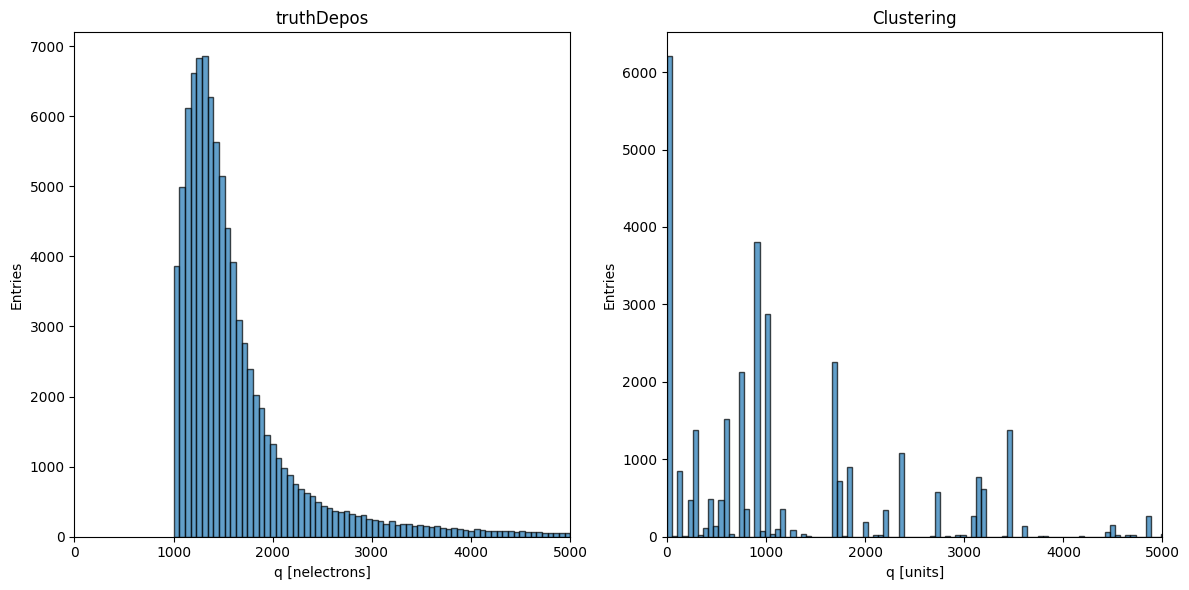

In [44]:
# Skip if truth files not found
if skip_if_needed():
    print("Skipping this cell.")
else:
    
    # Create figure and subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

    # First scatter plot (left)
    axes[0].hist(q_true, bins=200, edgecolor='black', alpha=0.7)
    axes[0].set_xlim(0, 5000) # Set x-axis range
    #axes[0].set_ylim(-150, 0)  # Set y-axis range
    axes[0].set_xlabel("simEnergyDepos charge [nelectrons]")
    axes[0].set_ylabel("Entries")
    axes[0].set_title("truthDepos")

    # First scatter plot (left)
    axes[1].hist(q_pred, bins=200, edgecolor='black', alpha=0.7)
    axes[1].set_xlim(0, 5000) # Set x-axis range
    #axes[1].set_ylim(-150, 0)  # Set y-axis range
    axes[1].set_xlabel("blob charge [units]")
    axes[1].set_ylabel("Entries")
    axes[1].set_title("Clustering")

    # Adjust layout and show plot
    plt.tight_layout()
    plt.show()

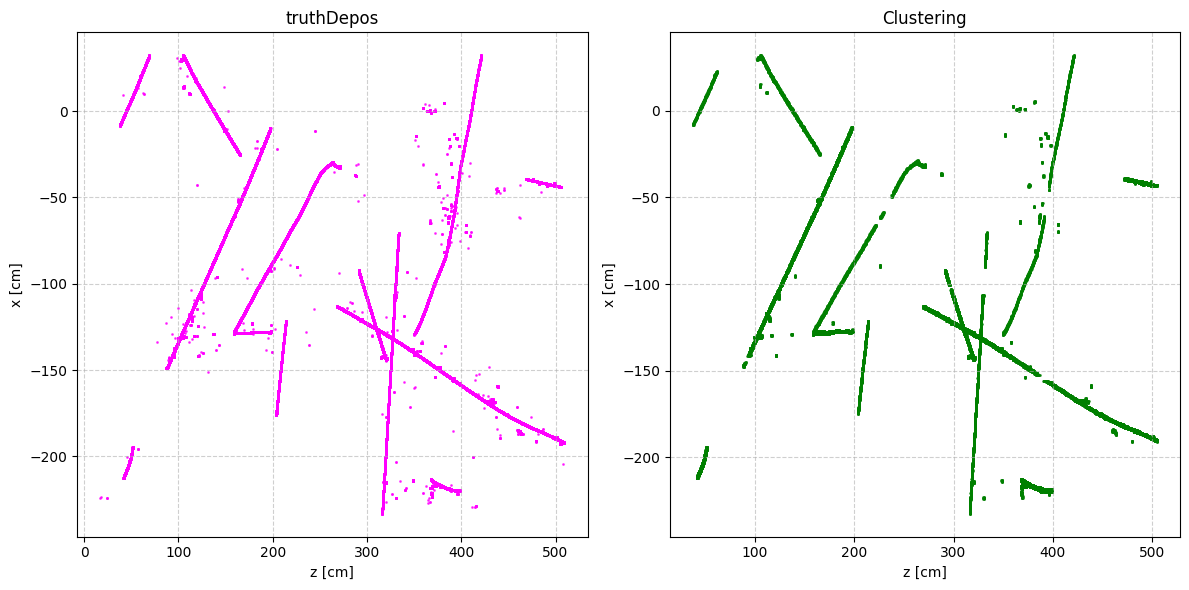

In [45]:
# Skip if truth files not found
if skip_if_needed():
    print("Skipping this cell.")
else:

    # plot 2D
    import matplotlib.pyplot as plt

    # Create figure and subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

    # First scatter plot (left)
    axes[0].scatter(z_true, x_true, color='magenta', alpha=0.7, s=1)
    #axes[0].set_xlim(150, 300)  # Set x-axis range
    #axes[0].set_ylim(-150, 0)  # Set y-axis range
    axes[0].set_xlabel("z [cm]")
    axes[0].set_ylabel("x [cm]")
    axes[0].set_title("truthDepos")
    axes[0].grid(True, linestyle='--', alpha=0.6)

    # First scatter plot (left)
    axes[1].scatter(z_pred, x_pred, color='green', alpha=0.7, s=1)
    #axes[1].set_xlim(axes[0].get_xlim())  # Set x-axis range
    #axes[1].set_ylim(axes[0].get_ylim())  # Set y-axis range
    axes[1].set_xlabel("z [cm]")
    axes[1].set_ylabel("x [cm]")
    axes[1].set_title("Clustering")
    axes[1].grid(True, linestyle='--', alpha=0.6)

    # Adjust layout and show plot
    plt.tight_layout()
    plt.show()

In [46]:
# Skip if truth files not found
if skip_if_needed():
    print("Skipping this cell.")
else:
    
    # apply energy cutoff for each true cluster
    true_5d_points = np.column_stack((x_true, y_true, z_true, id_true, q_true, e_true))

    # Compute sum of e_true per cluster (grouped by id_true)
    cluster_sums = {}
    for point in true_5d_points:
        cluster_sums[point[3]] = cluster_sums.get(point[3], 0) + point[5]  # id_true at index 3, e_true at index 4

    # Filter points, keeping only clusters where sum(e_true) >= min_cluster_energy
    true_5d_points = np.array([point for point in true_5d_points if cluster_sums[point[3]] >= min_cluster_energy])

    # skip if no truth clusters with min_cluster_energy
    if(len(true_5d_points)==0):
        SKIP_NOTEBOOK = True

    #print(len(true_5d_points))

In [47]:
# Skip if truth files not found
if skip_if_needed():
    print("Skipping this cell.")
else:

    # re-assign cluster ID to be the average x-position
    import numpy as np

    # Group points by ID and compute average x for each cluster
    clusters = {}
    for point in true_5d_points:   
        cluster_id = point[3]  # Original cluster ID
        if cluster_id not in clusters:
            clusters[cluster_id] = []
        clusters[cluster_id].append(point)

    # Compute new cluster IDs based on average x position
    new_points = []
    for cluster_id, points in clusters.items():
        points = np.array(points)
        avg_x = np.mean(points[:, 0])  # Compute average x-position
        points[:, 3] = avg_x  # Reassign cluster ID to avg_x
        new_points.append(points)

    # Flatten list into a NumPy array
    true_5d_points = np.vstack(new_points)

In [48]:
# Skip if truth files not found
if skip_if_needed():
    print("Skipping this cell.")
else:

    # re-assign cluster ID to be the average x-position
    import numpy as np

    # These were previously selected and stored
    predicted_5d_points = np.column_stack((x_pred, y_pred, z_pred, id_pred, q_pred))

    # Group points by ID and compute average x for each cluster
    clusters = {}
    for point in predicted_5d_points:
        cluster_id = point[3]  # Original cluster ID
        if cluster_id not in clusters:
            clusters[cluster_id] = []
        clusters[cluster_id].append(point)

    # Compute new cluster IDs based on average x position
    new_points = []
    for cluster_id, points in clusters.items():
        points = np.array(points)
        avg_x = np.mean(points[:, 0])  # Compute average x-position
        points[:, 3] = avg_x  # Reassign cluster ID to avg_x
        new_points.append(points)

    # Flatten list into a NumPy array
    predicted_5d_points = np.vstack(new_points)

In [49]:
# Skip if truth files not found
if skip_if_needed():
    print("Skipping this cell.")
else:

    #--------------------------------------
    # match pred to true using KDTree query
    #--------------------------------------
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.neighbors import KDTree

    target_5d_points = None
    target_points = None
    target_labels = None
    sample_5d_points = None
    sample_points = None
    sample_labels = None

    # Swap predicted vs true
    if metric == "efficiency":
      target_5d_points = predicted_5d_points
      target_points = target_5d_points[:, :3]
      target_labels = target_5d_points[:, 3]
      sample_5d_points = true_5d_points
      sample_points = sample_5d_points[:, :3]
      sample_labels = sample_5d_points[:, 3]
    elif metric == "purity":
      target_5d_points = true_5d_points
      target_points = target_5d_points[:, :3]
      target_labels = target_5d_points[:, 3]  
      sample_5d_points = predicted_5d_points
      sample_points = sample_5d_points[:, :3]
      sample_labels = sample_5d_points[:, 3]    
    else:
      print("\n Parameter 'metric' should be either 'efficiency' or 'purity'. Current value=", metric, "\n")
    
    # Create a KDTree from the true points
    tree = KDTree(target_points)

    # Query the KDTree to find the nearest neighbor in target_points for each sample_point
    # k=1 means nearest neighbor. 
    # indices = nearest neighbor indices in `target_points`.
    # All sample points are matched!
    dist, matched_target_indices = tree.query(sample_points, k=1)  # k=1 means nearest neighbor. # indices = nearest neighbor indices in `target_points`.

    print("All query points are matched!")
    print(f"Fraction of reference points matched = {len(matched_target_indices)/len(target_points)} (could be greater than 1 since a given reference point can be matched more than once.)")

All query points are matched!
Fraction of reference points matched = 0.4136302905409996 (could be greater than 1 since a given reference point can be matched more than once.)


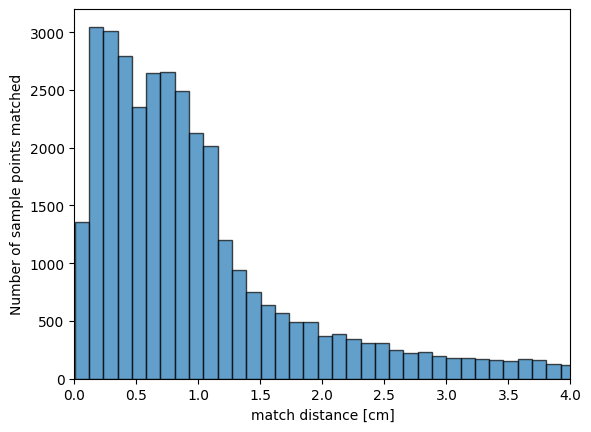

In [50]:
# Skip if truth files not found
if skip_if_needed():
    print("Skipping this cell.")
else:
    
    # plot KDTree matching distance
    import matplotlib.pyplot as plt
    # Create histogram
    plt.hist(dist, bins=1000, edgecolor='black', alpha=0.7)
    # Set x-axis limits
    plt.xlim(0, 4)  # xmin = -3, xmax = 3

    # Labels and title
    plt.xlabel("match distance [cm]")
    plt.ylabel("Number of sample points matched")
    plt.title("")

    # Show plot
    plt.show()

In [51]:
# Skip if truth files not found
if skip_if_needed():
    print("Skipping this cell.")
else:
    
    # Apply the distance threshold
    mask = (dist < knn_dist_threshold).flatten()  # Boolean mask for valid matches. Flatten the mask to be 1D

    # Filter the indices, sample points, and labels based on the mask
    selected_matched_target_indices = matched_target_indices[mask] # indices of target points within matching distance
    selected_matched_sample_points = sample_points[mask] # sample points within matching distance
    selected_matched_sample_labels = sample_labels[mask] # labels of sample points within matching distance

    #=========NEW=============
    selected_matched_sample_5d_points = sample_5d_points[mask]
    selected_matched_target_5d_points = target_5d_points[selected_matched_target_indices.flatten()]
    #=========NEW=============

    print("Fraction of query points matched to reference points and within threshold distance = ", len(selected_matched_sample_points)/len(sample_points))


    print(len(sample_5d_points))
    print(len(selected_matched_sample_points))
    print(len(selected_matched_sample_5d_points))
    print("Fraction of query points matched to reference points and within threshold distance = ", len(selected_matched_sample_5d_points)/len(sample_5d_points))
    print(len(target_5d_points))
    print(len(target_labels[selected_matched_target_indices.flatten()]))
    print(len(selected_matched_target_5d_points))

Fraction of query points matched to reference points and within threshold distance =  0.8135008622813501
36531
29718
29718
Fraction of query points matched to reference points and within threshold distance =  0.8135008622813501
88318
29718
29718



 number of target clusters matched =  12

 number of target clusters matched within threshold =  12

 number of sample clusters matched =  14

 number of sample clusters matched and selected =  13

 Sample = /exp/sbnd/data/users/ebatista/wirecell-clustering/out/sbndcode_v10_04_07/bnb_nu_cosmic_additional/xyz-coordinates :
 APA= APA0 
 event= 9 
 dist= 2  cm
 cutoff= 0.5 cm
 min_cluster_energy= 50 MeV
 bad query cluster: purity= 0.4398350940479258


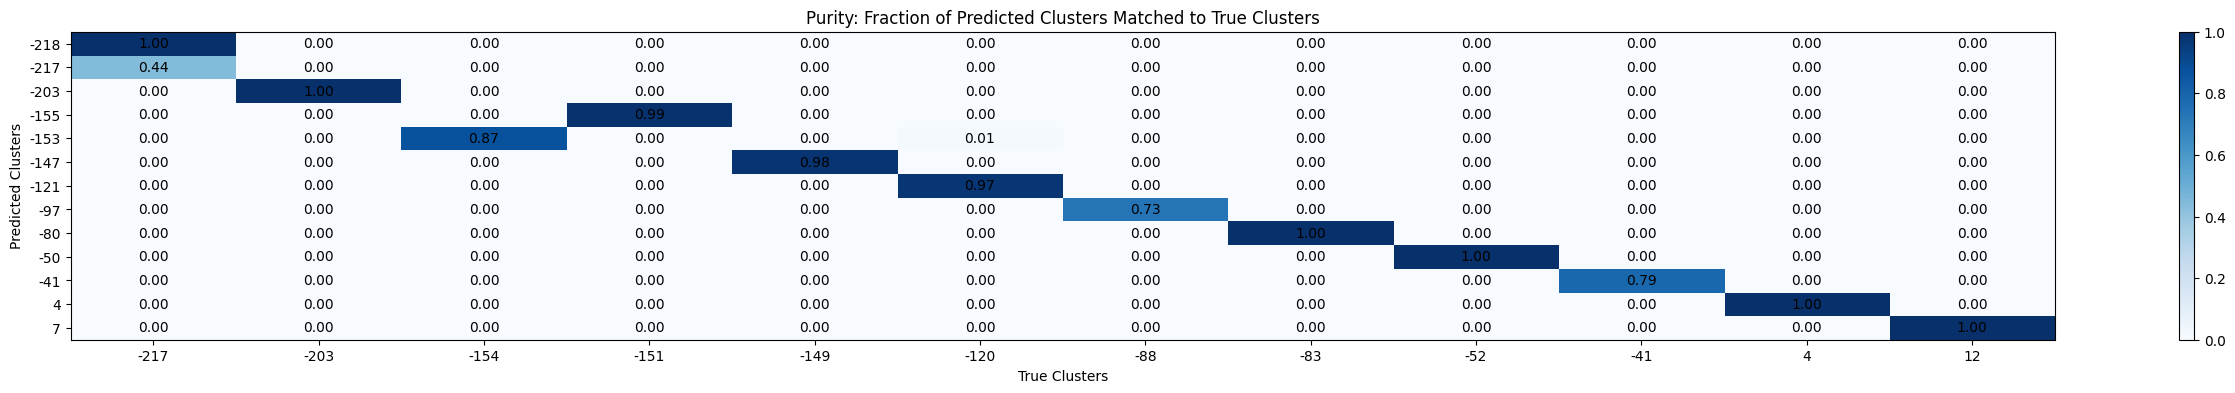

In [52]:
# Skip if truth files not found
if skip_if_needed():
    print("Skipping this cell.")
else:

    
    import numpy as np
    import matplotlib.pyplot as plt
    from collections import defaultdict
    from sklearn.neighbors import KDTree

    # Not used in calculations. Just for info
    matched_target_labels = target_labels[matched_target_indices.flatten()] # Not used in calculations. Just for info
    matched_target_clusters = defaultdict(int) # Not used in calculations. Just for info
    for i, label in enumerate(matched_target_labels):
        matched_target_clusters[label] += 1 # adds one point to this cluster
    print("\n number of target clusters matched = ", len(matched_target_clusters))


    # Convert indices to matched target labels
    selected_matched_target_labels = target_labels[selected_matched_target_indices.flatten()]  # Extract target labels passing threshold.


    # Use target_labels to create target_clusters
    _selected_matched_target_clusters = defaultdict(int)
    for i, label in enumerate(selected_matched_target_5d_points[:, 3]):
        _selected_matched_target_clusters[label] += 1 # adds one point to this cluster
    print("\n number of target clusters matched within threshold = ", len(_selected_matched_target_clusters))


    _matched_sample_clusters = defaultdict(float)
    for i, label in enumerate(sample_5d_points[:, 3]):
        q = sample_5d_points[i, 4]
        #if q ==0:
            #print("\n sample_5d_points[", i, ", 4] = ", q)
        _matched_sample_clusters[label] += q if metric == "efficiency" else 1 # q not well defined for sample=clustering. add one point instead
    print("\n number of sample clusters matched = ", len(_matched_sample_clusters))


    #_selected_matched_sample_clusters = defaultdict(list)
    _selected_matched_sample_clusters = defaultdict(float)
    for i, label in enumerate(selected_matched_sample_5d_points[:, 3]):
        q = selected_matched_sample_5d_points[i, 4] if metric == "efficiency" else 1 # q not well defined for sample=clustering. add one point instead
        #print(q)
        _selected_matched_sample_clusters[label] += q
    print("\n number of sample clusters matched and selected = ", len(_selected_matched_sample_clusters))


    _fractions_sample_to_target_clusters = defaultdict(lambda: defaultdict(float))
    for i, selected_matched_sample_label in enumerate(selected_matched_sample_5d_points[:, 3]):
        selected_matched_target_label = selected_matched_target_5d_points[i, 3]
        q = selected_matched_sample_5d_points[i, 4] if metric == "efficiency" else 1 # q not well defined for sample=clustering. add one point instead
        _fractions_sample_to_target_clusters[selected_matched_sample_label][selected_matched_target_label] += q # adds one matched sample point to this bin

    # Normalize by total points in each sample cluster
    for selected_matched_sample_label, matched_counts in _fractions_sample_to_target_clusters.items():
        total_q = _matched_sample_clusters[selected_matched_sample_label]
        if total_q == 0:
            print("\n sample label=",  selected_matched_sample_label, " with total_q==0!")
        for selected_matched_target_label in matched_counts:
            _fractions_sample_to_target_clusters[selected_matched_sample_label][selected_matched_target_label] /= total_q  # Convert to fraction

    # Prepare a matrix for visualization
    _unique_target_labels = sorted(_selected_matched_target_clusters.keys())
    _unique_sample_labels = sorted(_selected_matched_sample_clusters.keys())

    # Create a matrix to hold fractions
    _fraction_matrix = np.zeros((len(_unique_sample_labels), len(_unique_target_labels)))

    # Fill the matrix with fraction values
    for i, sample_label in enumerate(_unique_sample_labels):
        for j, target_label in enumerate(_unique_target_labels):
            _fraction_matrix[i, j] = _fractions_sample_to_target_clusters[sample_label].get(target_label, 0)


    # Prepare a matrix for visualization
    unique_target_labels = sorted(_selected_matched_target_clusters.keys())
    unique_sample_labels = sorted(_selected_matched_sample_clusters.keys())


    # Plot the matrix
    if metric == "efficiency":    
      plt.figure(figsize=(10, 10))
      plt.imshow(_fraction_matrix, cmap="Blues", aspect='auto', interpolation='nearest')    
      plt.colorbar()
      plt.title("Charge-weighted efficiency: Fraction of True Clusters Matched to Predicted Clusters")
      plt.xlabel("Predicted Clusters")
      plt.ylabel("True Clusters")
    elif metric == "purity":
      plt.figure(figsize=(32, 4))
      plt.imshow(_fraction_matrix, cmap="Blues", aspect='auto', interpolation='nearest')
      plt.colorbar()
      plt.title("Purity: Fraction of Predicted Clusters Matched to True Clusters")
      plt.xlabel("True Clusters")
      plt.ylabel("Predicted Clusters")
    else:
      print("\n Parameter 'metric' should be either 'efficiency' or 'purity'. Current value=", metric)
    
    # Set x-ticks and y-ticks labels
    # Convert to integers
    unique_target_labels = [int(label) for label in unique_target_labels]
    unique_sample_labels = [int(label) for label in unique_sample_labels]

    _unique_target_labels = [int(label) for label in _unique_target_labels]
    _unique_sample_labels = [int(label) for label in _unique_sample_labels]

    plt.xticks(np.arange(len(_unique_target_labels)), _unique_target_labels)
    plt.yticks(np.arange(len(_unique_sample_labels)), _unique_sample_labels)

    # Add text annotations for each bin value
    rows, cols = _fraction_matrix.shape
    for i in range(rows):
        sample_cluster_total_frac = 0
        for j in range(cols):
            plt.text(j, i, f"{_fraction_matrix[i, j]:.2f}",  # Format to 2 decimal places
                     ha='center', va='center', color='black')
            sample_cluster_total_frac += _fraction_matrix[i, j]
        if 0 < sample_cluster_total_frac < cutoff:    
            if metric == "efficiency":
                print("\n Sample =", NEWOUTDIR, ":\n APA=", apa, "\n event=", evt, "\n dist=", knn_dist_threshold, "cm\n cutoff=", cutoff, "\n min_cluster_energy=", min_cluster_energy, "MeV\n bad query cluster: efficiency=", sample_cluster_total_frac)
            if metric == "purity":
                print("\n Sample =", NEWOUTDIR, ":\n APA=", apa, "\n event=", evt, "\n dist=", knn_dist_threshold, "cm\n cutoff=", cutoff, "\n min_cluster_energy=", min_cluster_energy, "MeV\n bad query cluster: purity=", sample_cluster_total_frac)
    plt.show()

    # Save the figure as a JPEG before showing
    #plt.savefig("output_image.jpg", format="jpeg", dpi=300, bbox_inches="tight")


In [53]:
# Skip if truth files not found
if skip_if_needed():
    print("Skipping this cell.")
else:

    
    # Get max for each sample cluster
    max_ = [row.max() for row in _fraction_matrix]

Total clusters:  13


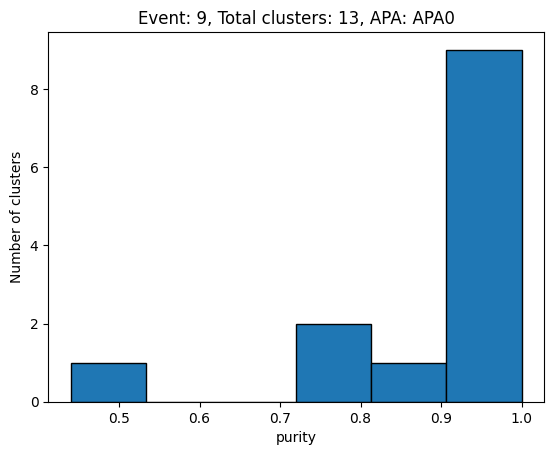

In [54]:
# Skip if truth files not found
if skip_if_needed():
    print("Skipping this cell.")
else:

    
    #'''
    # Create histogram with max for each sample cluster
    fig, ax = plt.subplots()
    ax.hist(max_, bins='auto', edgecolor='black')
    #ax.set_title(f'Event {evt}, {apa}: {metric}')
    ax.set_title(f'Event: {evt}, Total clusters: {len(max_)}, APA: {apa}')
    ax.set_xlabel(f'{metric}')
    ax.set_ylabel('Number of clusters')
    print("Total clusters: ", len(max_))
    #'''